In [1]:
import json
import os
import matplotlib.pyplot as plt

In [2]:
train_dir = '/kaggle/input/tiny-object-detection/SkyFusion/train'
valid_dir = '/kaggle/input/tiny-object-detection/SkyFusion/valid'
test_dir = '/kaggle/input/tiny-object-detection/SkyFusion/test'

In [3]:
def extract_classes(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    categories = data.get('categories', [])
    class_names = [category['name'] for category in categories]
    return class_names

train_classes = extract_classes(os.path.join(train_dir, "_annotations.coco.json"))
valid_classes = extract_classes(os.path.join(valid_dir, "_annotations.coco.json"))
test_classes = extract_classes(os.path.join(test_dir, "_annotations.coco.json"))

all_classes = set(train_classes + valid_classes + test_classes)
print("Unique object classes:", all_classes)

Unique object classes: {'vehicle', 'ship', 'Aircraft'}


In [4]:
def count_images(directory):
    return len([file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))])

train_image_count = count_images(train_dir)
valid_image_count = count_images(valid_dir)
test_image_count = count_images(test_dir)

print("Number of train images:", train_image_count)
print("Number of validation images:", valid_image_count)
print("Number of test images:", test_image_count)

Number of train images: 2094
Number of validation images: 449
Number of test images: 449


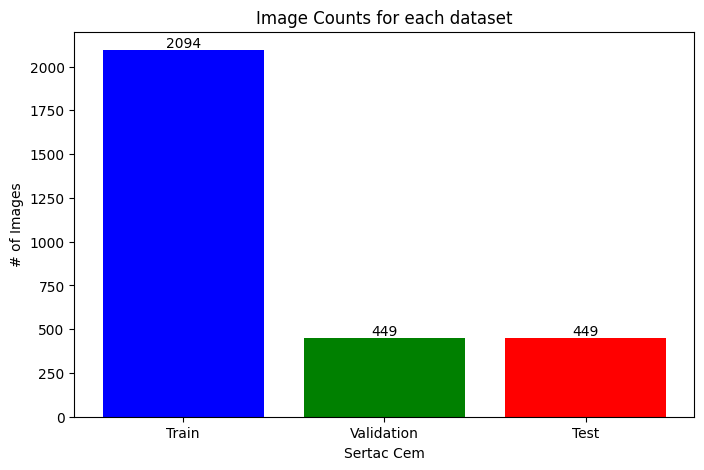

In [5]:
plt.figure(figsize=(8, 5))
counts = [train_image_count, valid_image_count, test_image_count]
labels = ['Train', 'Validation', 'Test']
bars = plt.bar(labels, counts, color=['blue', 'green', 'red'])
plt.title('Image Counts for each dataset')
plt.xlabel('Sertac Cem')
plt.ylabel('# of Images')

# Add annotations on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')

plt.show()

In [6]:
def class_distribution(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    categories = data.get('categories', [])
    category_map = {category['id']: category['name'] for category in categories}
    
    annotations = data.get('annotations', [])
    class_counts = {}
    for annotation in annotations:
        category_id = annotation['category_id']
        category_name = category_map.get(category_id, 'Unknown')
        class_counts[category_name] = class_counts.get(category_name, 0) + 1
    
    return class_counts

train_class_dist = class_distribution(os.path.join(train_dir, "_annotations.coco.json"))
valid_class_dist = class_distribution(os.path.join(valid_dir, "_annotations.coco.json"))
test_class_dist = class_distribution(os.path.join(test_dir, "_annotations.coco.json"))

def merge_class_distributions(*distributions):
    merged = {}
    for dist in distributions:
        for key, value in dist.items():
            merged[key] = merged.get(key, 0) + value
    return merged

combined_class_dist = merge_class_distributions(train_class_dist, valid_class_dist, test_class_dist)

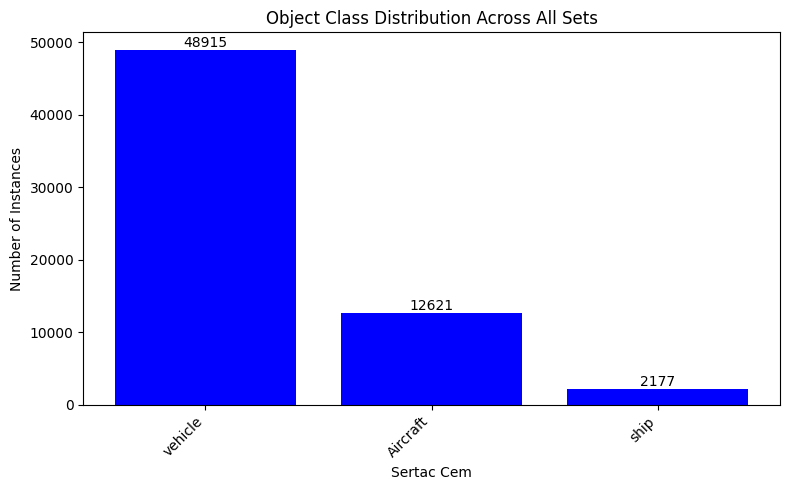

In [7]:
plt.figure(figsize=(8, 5))
bars = plt.bar(combined_class_dist.keys(), combined_class_dist.values(), color='blue')
plt.title('Object Class Distribution Across All Sets')
plt.xlabel('Sertac Cem')
plt.ylabel('Number of Instances')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [8]:
import os
import json

def convert_coco_to_yolo(coco_file, output_dir="/kaggle/working/"):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Open the COCO JSON file
    with open(coco_file, 'r') as f:
        data = json.load(f)
    
    # Map category IDs from COCO to YOLO format
    categories = data['categories']
    category_map = {category['id']: idx for idx, category in enumerate(categories)}

    # Process each image in the COCO file
    for image_info in data['images']:
        image_id = image_info['id']
        image_width = image_info['width']
        image_height = image_info['height']
        file_name = os.path.splitext(image_info['file_name'])[0]

        # Define the path for the YOLO annotation file
        yolo_file_path = os.path.join(output_dir, f"{file_name}.txt")
        
        # Write annotations for each object in the image
        with open(yolo_file_path, 'w') as yolo_file:
            for annotation in data['annotations']:
                if annotation['image_id'] == image_id:
                    category_id = annotation['category_id']
                    yolo_class_id = category_map[category_id]

                    # Get the bounding box and convert it to YOLO format
                    bbox = annotation['bbox']
                    x, y, width, height = bbox

                    # Calculate the normalized center coordinates and dimensions
                    x_center = (x + width / 2) / image_width
                    y_center = (y + height / 2) / image_height
                    width /= image_width
                    height /= image_height

                    # Write to the YOLO file
                    yolo_file.write(f"{yolo_class_id} {x_center} {y_center} {width} {height}\n")

    print(f"Conversion completed for {coco_file}. Annotations saved to {output_dir}")

In [9]:
train_coco_file = os.path.join(train_dir, '_annotations.coco.json')
valid_coco_file = os.path.join(valid_dir, '_annotations.coco.json')
test_coco_file = os.path.join(test_dir, '_annotations.coco.json')

convert_coco_to_yolo(train_coco_file, "/kaggle/working/train")
convert_coco_to_yolo(valid_coco_file, "/kaggle/working/valid")
convert_coco_to_yolo(test_coco_file, "/kaggle/working/test")

Conversion completed for /kaggle/input/tiny-object-detection/SkyFusion/train/_annotations.coco.json. Annotations saved to /kaggle/working/train
Conversion completed for /kaggle/input/tiny-object-detection/SkyFusion/valid/_annotations.coco.json. Annotations saved to /kaggle/working/valid
Conversion completed for /kaggle/input/tiny-object-detection/SkyFusion/test/_annotations.coco.json. Annotations saved to /kaggle/working/test


In [10]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.8/225.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.4/291.4 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.17
    Uninstalling albucore-0.0.17:
      Successfully uninstalled albucore-0.0.17
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17


In [11]:
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
import shutil


transform = A.Compose([
    A.Resize(640, 640),  
    A.HorizontalFlip(p=0.5), 
    A.RandomBrightnessContrast(p=0.2), 
    #A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [12]:
import os
import cv2
import shutil
from tqdm import tqdm

def preprocess_images(input_dir, output_base_dir):
    # Loop through each subset (train, test, valid)
    for subset in ['train', 'test', 'valid']:
        # Create the output directory for each subset
        output_dir = os.path.join(output_base_dir, subset)
        os.makedirs(output_dir, exist_ok=True)
        
        input_subset_dir = os.path.join(input_dir, subset)
        
        for img_name in tqdm(os.listdir(input_subset_dir)):
            
            if img_name.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(input_subset_dir, img_name)
                image = cv2.imread(img_path)
                
                if image is None:
                    continue
                
                
                transformed = transform(image=image)
                transformed_image = transformed['image']
                
                # Save the transformed image in the output directory
                output_path = os.path.join(output_dir, img_name)
                cv2.imwrite(output_path, transformed_image * 255)
    
    print(f"Preprocessing completed. Images saved to {output_base_dir}/train, {output_base_dir}/test, and {output_base_dir}/valid.")

In [13]:
base_dir = '/kaggle/input/tiny-object-detection/SkyFusion'

In [14]:
preprocess_images(base_dir, '/kaggle/working')

100%|██████████| 450/450 [00:07<00:00, 58.11it/s]

Preprocessing completed. Images saved to /kaggle/working/train, /kaggle/working/test, and /kaggle/working/valid.


In [16]:
import shutil

source_path = '/kaggle/input/yaml-file/satellite_data.yaml'

destination_path = '/kaggle/working'

shutil.copy(source_path, destination_path)

print(f"File copied to {destination_path}")

File copied to /kaggle/working


In [17]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 13.1 MB/s eta 0:00:00a 0:00:01


In [18]:
from ultralytics import YOLO

data_yaml = "/kaggle/working/satellite_data.yaml"

model = YOLO('yolo11s.pt') 

# Train the model
model.train(data=data_yaml, epochs=150, batch=16, imgsz=640, name='satellite_yolo_model_mosaic_150', mosaic=1.0)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 154MB/s]


Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/satellite_data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=satellite_yolo_model_mosaic_150, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 13.5MB/s]
2024-10-28 11:47:39,585	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-28 11:47:40,790	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 62.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train... 2094 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2094/2094 [00:01<00:00, 1074.21it/s]


train: New cache created: /kaggle/working/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/valid... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<00:00, 967.08it/s] 

val: New cache created: /kaggle/working/valid.cache


Plotting labels to runs/detect/satellite_yolo_model_mosaic_150/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/satellite_yolo_model_mosaic_150
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      11.6G      2.306      2.675      1.372        222        640: 100%|██████████| 131/131 [00:41<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.14it/s]


                   all        449       8387      0.205      0.171     0.0979      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      13.3G      2.324      2.141       1.32        233        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387      0.145      0.135     0.0811     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      10.7G      2.488      2.297      1.333        251        640: 100%|██████████| 131/131 [00:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        449       8387      0.197      0.144     0.0876     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      11.8G      2.408      2.204      1.303        651        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.529      0.166     0.0987     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      11.4G      2.438      2.217      1.285        257        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.59it/s]

                   all        449       8387      0.828      0.157      0.105     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      14.2G      2.346      2.094      1.249        224        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.60it/s]

                   all        449       8387      0.535      0.181      0.108     0.0575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      11.3G       2.37       2.11      1.246        439        640: 100%|██████████| 131/131 [00:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        449       8387      0.243      0.195      0.112     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      12.9G      2.344      2.114      1.233        207        640: 100%|██████████| 131/131 [00:40<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                   all        449       8387      0.224        0.2      0.113     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      9.68G      2.277      2.052      1.231        288        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]

                   all        449       8387      0.253      0.196      0.118     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      9.02G      2.216      1.979       1.21        397        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]

                   all        449       8387      0.245      0.205      0.122     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      11.9G      2.225      2.027      1.216        286        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]

                   all        449       8387       0.25      0.212      0.117     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      10.1G      2.249      2.005      1.213        576        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        449       8387      0.273        0.2      0.124     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      10.4G      2.228      2.028      1.203        329        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        449       8387      0.263      0.209      0.123     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      11.3G      2.234      2.001      1.208        732        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]

                   all        449       8387      0.261       0.22      0.124     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      9.95G      2.272       2.04      1.215        210        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]

                   all        449       8387      0.654      0.161      0.112     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      12.5G      2.163      1.976      1.195       1008        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]

                   all        449       8387      0.262      0.219      0.131     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      9.32G      2.187      1.961      1.176        679        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]

                   all        449       8387      0.274      0.225      0.128     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.57G      2.199      1.983      1.184        328        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.69it/s]

                   all        449       8387      0.276      0.218      0.132      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      15.2G      2.185      1.986      1.186        314        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]

                   all        449       8387      0.284      0.223      0.135     0.0692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      13.3G      2.157      1.939      1.184        858        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]

                   all        449       8387      0.288      0.211      0.122      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      13.5G       2.18      1.949      1.177        224        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]

                   all        449       8387      0.278      0.242      0.134     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150        12G      2.194      2.033      1.192        298        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]

                   all        449       8387      0.314      0.228       0.14     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      11.7G      2.135      1.875      1.156        200        640: 100%|██████████| 131/131 [00:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.82it/s]

                   all        449       8387      0.286      0.205      0.131     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      11.5G      2.176       1.95      1.164        469        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387       0.28      0.236      0.141     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      12.8G      2.212      1.998      1.189        217        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]

                   all        449       8387      0.279      0.233      0.129     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      9.16G       2.11      1.904      1.171        232        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]

                   all        449       8387      0.265      0.238       0.14     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      9.78G      2.127      1.917      1.164        298        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]

                   all        449       8387      0.272      0.239      0.135     0.0718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      12.2G      2.156      1.939      1.171        139        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.72it/s]

                   all        449       8387       0.27      0.251      0.137      0.073



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      9.35G      2.124      1.895      1.172        169        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                   all        449       8387      0.303      0.237      0.141     0.0718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      9.86G       2.14      1.965      1.168        323        640: 100%|██████████| 131/131 [00:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]

                   all        449       8387      0.297      0.229      0.136     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150        11G      2.086      1.848      1.143       1028        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        449       8387      0.275       0.26      0.145     0.0779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      9.18G      2.119        1.9      1.152        268        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]

                   all        449       8387      0.261      0.242      0.145     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      14.4G       2.12      1.891      1.144        418        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]

                   all        449       8387      0.299      0.247       0.15      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      9.85G      2.063      1.906       1.17        471        640: 100%|██████████| 131/131 [00:39<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.78it/s]

                   all        449       8387      0.296       0.26       0.15     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      9.77G      2.067      1.848      1.138        339        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]

                   all        449       8387      0.312      0.239      0.147     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      10.1G      2.093      1.869      1.146        541        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]

                   all        449       8387      0.272      0.228      0.138     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.49G      2.099      1.878      1.145        216        640: 100%|██████████| 131/131 [00:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]

                   all        449       8387      0.309      0.211      0.138     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150        11G      2.138      1.929      1.165        506        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.78it/s]

                   all        449       8387      0.322      0.229      0.146     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.56G      2.031       1.82       1.14        242        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]

                   all        449       8387      0.292      0.251      0.147      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.84G      2.052      1.854      1.142        275        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]

                   all        449       8387      0.301      0.253      0.148     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      10.8G      2.048      1.818      1.132        193        640: 100%|██████████| 131/131 [00:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]

                   all        449       8387      0.279      0.247       0.14     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150        11G      2.025       1.79      1.131        324        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]

                   all        449       8387      0.524      0.237      0.157     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      9.54G      2.064      1.813      1.131        384        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]

                   all        449       8387      0.342      0.248       0.16     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      11.4G      1.986      1.792      1.139        594        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]

                   all        449       8387      0.309      0.236      0.148     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      13.3G      2.085      1.882      1.141        253        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.64it/s]

                   all        449       8387      0.294      0.232      0.146     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150        12G      2.062      1.839      1.141        158        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]

                   all        449       8387      0.285      0.259      0.148     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      11.1G      2.026      1.826      1.137        285        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        449       8387      0.301      0.264      0.152     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      9.96G      2.046      1.825      1.146        231        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]

                   all        449       8387      0.317      0.257      0.159     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      10.5G      2.066      1.877      1.136        435        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                   all        449       8387      0.291      0.266       0.15     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      11.2G      2.038      1.803      1.133       1092        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.323      0.264      0.165     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      10.1G      2.048      1.855       1.13        151        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        449       8387        0.3      0.257      0.149     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      12.4G      2.007      1.823      1.134        318        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        449       8387      0.346      0.253      0.164     0.0887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      11.2G      2.031      1.843      1.134        318        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.71it/s]

                   all        449       8387      0.282      0.266      0.146     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      10.7G      2.043       1.83      1.124        203        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]

                   all        449       8387      0.295      0.278      0.154     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      11.8G      2.048      1.826      1.129        376        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]

                   all        449       8387      0.317      0.257      0.161     0.0831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      12.5G      2.049      1.867      1.138        206        640: 100%|██████████| 131/131 [00:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.303      0.258      0.157     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      11.7G      2.038      1.825      1.131        291        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.301      0.266      0.157     0.0844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      10.3G      2.032      1.829      1.126        153        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]

                   all        449       8387      0.296      0.276      0.164     0.0865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      12.8G      2.008      1.834      1.133        528        640: 100%|██████████| 131/131 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]

                   all        449       8387      0.323      0.233       0.15     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      12.2G      1.984      1.788      1.136        218        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387      0.313      0.277      0.162     0.0835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      11.7G       1.97      1.728       1.11       1051        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]

                   all        449       8387      0.299      0.266      0.155     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.19G      2.048      1.838      1.138        349        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]

                   all        449       8387      0.306      0.278      0.155      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      10.1G      2.004      1.819      1.128        103        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        449       8387      0.301      0.274      0.163     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      13.3G       2.05       1.84      1.122        565        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]

                   all        449       8387      0.315      0.265      0.156     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      11.3G      1.984      1.777      1.115        253        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387        0.3      0.257      0.155     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150        13G      1.996        1.8      1.124        669        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        449       8387      0.335      0.273      0.173     0.0911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150       9.6G      1.988      1.839      1.128        238        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]

                   all        449       8387       0.32      0.268      0.166     0.0869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      12.9G      1.954      1.748      1.118        108        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.78it/s]

                   all        449       8387      0.325      0.257      0.165     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      14.6G      2.035      1.825      1.125        297        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]

                   all        449       8387       0.31      0.264      0.165     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.43G      1.983      1.813      1.132        347        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        449       8387      0.307      0.248      0.153      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      10.4G      2.002      1.802      1.127        288        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]

                   all        449       8387      0.324       0.27      0.167     0.0875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      10.5G      1.975      1.791      1.126        259        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387      0.316      0.269      0.167     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      10.1G      1.928      1.727      1.102        728        640: 100%|██████████| 131/131 [00:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        449       8387      0.311       0.28      0.167     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      12.3G      2.006       1.81      1.128        365        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.334      0.274       0.17     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150        11G      2.014      1.849       1.14        190        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]

                   all        449       8387      0.307       0.27      0.169     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      10.5G      1.995      1.801      1.127        438        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        449       8387      0.315      0.265       0.17     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      10.6G      1.993      1.786      1.118        283        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]

                   all        449       8387      0.301      0.276      0.167     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      10.1G      1.963      1.768      1.112        391        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        449       8387      0.338      0.286      0.175     0.0899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150        12G      1.982      1.777      1.107        249        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]

                   all        449       8387       0.33      0.257      0.173     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      12.4G        1.9      1.726      1.116        230        640: 100%|██████████| 131/131 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.329      0.271      0.176     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.42G       1.92      1.739      1.115        154        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                   all        449       8387      0.318       0.27      0.167      0.087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      10.1G      1.973      1.764      1.119        340        640: 100%|██████████| 131/131 [00:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]

                   all        449       8387      0.326      0.283      0.172     0.0899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      9.69G      1.943       1.77      1.109        602        640: 100%|██████████| 131/131 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]

                   all        449       8387      0.304      0.285      0.158     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      11.3G      1.954      1.789      1.111        494        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387       0.31      0.293      0.162      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      10.1G      1.943      1.798      1.119        567        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        449       8387      0.324      0.269      0.162     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      11.9G       1.94      1.773      1.115        299        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]

                   all        449       8387      0.321      0.285      0.171      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150       9.2G       1.94       1.79       1.12        164        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.332      0.278       0.17      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150        14G      1.952       1.74      1.108        178        640: 100%|██████████| 131/131 [00:40<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        449       8387      0.315      0.287      0.163     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      9.26G      1.882      1.675      1.087        491        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.327      0.287      0.176     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      9.65G      1.972      1.779      1.119        616        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                   all        449       8387      0.325      0.285       0.17     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      9.44G      1.917      1.763      1.116        612        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]

                   all        449       8387      0.316      0.287      0.167     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      9.72G      1.926       1.76      1.113        262        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                   all        449       8387      0.323      0.285      0.173     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      9.86G      1.945      1.757      1.107        202        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        449       8387      0.329      0.283      0.172     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150        11G       1.89      1.707      1.097        265        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387      0.324      0.276      0.169     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      12.7G      1.884      1.693      1.091        522        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        449       8387      0.315      0.278      0.172     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      14.7G      1.874      1.658      1.089        515        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        449       8387      0.321       0.28      0.173     0.0919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      10.6G      1.905      1.707      1.102        624        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        449       8387       0.33      0.291      0.176      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      11.4G      1.928      1.745      1.102        381        640: 100%|██████████| 131/131 [00:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]

                   all        449       8387      0.333      0.266      0.173     0.0905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      12.6G      1.888      1.688      1.103        253        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387      0.347      0.285       0.18     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      11.8G      1.918       1.76      1.105        381        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        449       8387      0.331      0.284      0.175      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      8.38G       1.93      1.773      1.123        599        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.339      0.289       0.18     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150        12G      1.893      1.708      1.101        384        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        449       8387      0.347      0.293      0.178     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      10.2G      1.911      1.738      1.109        193        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        449       8387      0.336      0.285      0.175     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      11.7G      1.913      1.735      1.097        338        640: 100%|██████████| 131/131 [00:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        449       8387      0.324      0.275      0.171     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      11.8G      1.866      1.706      1.107        303        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]

                   all        449       8387      0.318      0.282      0.178     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      9.78G      1.919      1.713      1.101        200        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]

                   all        449       8387      0.348      0.291      0.182     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      11.5G      1.883      1.699      1.093        299        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.336       0.28      0.175     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      11.8G      1.853      1.667      1.091        740        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.315      0.273      0.175     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      11.9G      1.872      1.689      1.108        289        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]

                   all        449       8387      0.334      0.281       0.18     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      9.84G      1.899      1.742        1.1        126        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387      0.335      0.277      0.174      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      11.3G      1.868      1.688      1.097        289        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]

                   all        449       8387      0.335      0.277      0.183     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      11.6G      1.906      1.739      1.103        178        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.342      0.284      0.182     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      13.4G       1.92      1.726      1.095        592        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]

                   all        449       8387      0.337      0.288      0.173     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      9.74G       1.91       1.77      1.117        361        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]

                   all        449       8387      0.337      0.284      0.174     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      13.6G      1.857      1.715        1.1        107        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                   all        449       8387      0.317      0.278      0.178     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150        12G      1.915      1.697      1.085        325        640: 100%|██████████| 131/131 [00:40<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387       0.33      0.285      0.173     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      12.4G      1.821      1.661       1.09        319        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]

                   all        449       8387      0.328      0.272      0.176      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      10.4G      1.852      1.651      1.089        346        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        449       8387      0.324      0.281      0.178      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.65G       1.85      1.692      1.095        252        640: 100%|██████████| 131/131 [00:39<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        449       8387      0.341      0.285      0.178     0.0941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      11.1G      1.912       1.73      1.093        358        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        449       8387      0.342      0.294      0.178      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      10.1G      1.892      1.727      1.097        170        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        449       8387       0.35      0.278      0.176     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      11.6G      1.869      1.686      1.092        481        640: 100%|██████████| 131/131 [00:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        449       8387      0.351      0.285      0.178     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.59G      1.899      1.683      1.087        437        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]

                   all        449       8387      0.341      0.287      0.181     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      13.4G      1.855      1.703        1.1        355        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]

                   all        449       8387      0.331      0.282      0.176     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      11.2G      1.844      1.651      1.086        320        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]

                   all        449       8387      0.319      0.284      0.172     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      10.7G      1.854      1.691      1.086        352        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.324       0.29      0.174      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      12.3G      1.832       1.63      1.078        349        640: 100%|██████████| 131/131 [00:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]

                   all        449       8387      0.339      0.276      0.175     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      11.5G      1.782      1.619      1.075        184        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.342      0.279      0.179     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      7.92G      1.891      1.744      1.099        274        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]

                   all        449       8387      0.351      0.286      0.181     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      11.9G      1.866      1.691      1.092        420        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        449       8387      0.341      0.286      0.177     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      10.2G      1.841      1.637      1.071        338        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        449       8387      0.345      0.283       0.18     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       9.4G      1.817      1.647      1.083        484        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                   all        449       8387       0.34      0.283       0.18     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      9.93G      1.832      1.646      1.067        478        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.334       0.28      0.177     0.0945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      14.2G      1.849      1.672      1.077        196        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.322      0.276      0.176     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      10.9G      1.848      1.638      1.075        443        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        449       8387      0.345      0.291      0.181     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      12.4G      1.808      1.596      1.071        400        640: 100%|██████████| 131/131 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]

                   all        449       8387      0.339      0.294      0.182     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      11.3G       1.85       1.68      1.084        451        640: 100%|██████████| 131/131 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.341      0.286      0.179     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      11.7G      1.772      1.573      1.074        265        640: 100%|██████████| 131/131 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.09it/s]

                   all        449       8387      0.346      0.289      0.182     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150        12G      1.826      1.654      1.077        175        640: 100%|██████████| 131/131 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        449       8387      0.351      0.292      0.183     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      12.1G      1.826      1.658      1.081        161        640: 100%|██████████| 131/131 [00:39<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        449       8387      0.341      0.291      0.183     0.0964


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      12.5G      1.868      1.759      1.114         70        640: 100%|██████████| 131/131 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        449       8387      0.341      0.277      0.175      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      12.6G      1.861      1.722      1.109        171        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        449       8387      0.334      0.285      0.175     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      11.8G      1.817      1.684      1.104        288        640: 100%|██████████| 131/131 [00:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]

                   all        449       8387      0.331      0.284      0.176     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.51G      1.813      1.661      1.099        633        640: 100%|██████████| 131/131 [00:38<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        449       8387      0.343      0.286      0.177     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      10.5G      1.845      1.721      1.095        171        640: 100%|██████████| 131/131 [00:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        449       8387      0.342      0.285       0.18     0.0931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      10.7G      1.856      1.718      1.094        217        640: 100%|██████████| 131/131 [00:39<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]

                   all        449       8387      0.335      0.282      0.178     0.0938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      10.8G      1.822      1.667      1.088        101        640: 100%|██████████| 131/131 [00:39<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]

                   all        449       8387       0.33      0.289       0.18     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150       8.3G      1.843      1.705      1.103        414        640: 100%|██████████| 131/131 [00:38<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        449       8387      0.348      0.285      0.182     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      12.4G      1.814      1.677      1.091        307        640: 100%|██████████| 131/131 [00:38<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        449       8387      0.334      0.287      0.181     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      10.7G      1.804      1.654      1.088        361        640: 100%|██████████| 131/131 [00:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]

                   all        449       8387      0.337      0.289      0.183     0.0958



150 epochs completed in 1.915 hours.
Optimizer stripped from runs/detect/satellite_yolo_model_mosaic_150/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/satellite_yolo_model_mosaic_150/weights/best.pt, 19.2MB

Validating runs/detect/satellite_yolo_model_mosaic_150/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]


                   all        449       8387      0.333      0.276      0.183     0.0971
              Aircraft        149       1957      0.498      0.505      0.318      0.204
                  ship        150        288      0.246     0.0868     0.0818     0.0361
               vehicle        150       6142      0.254      0.235       0.15     0.0515
Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/satellite_yolo_model_mosaic_150


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7903a36c9c60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [19]:
model_mosaic_150 = YOLO("/kaggle/working/runs/detect/satellite_yolo_model_mosaic_150/weights/best.pt")

In [20]:
results_mosaic_150 = model_mosaic_150.val(data="/kaggle/working/satellite_data.yaml")

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /kaggle/working/valid.cache... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.62it/s]


                   all        449       8387      0.334      0.275      0.182     0.0968
              Aircraft        149       1957      0.498      0.505      0.319      0.204
                  ship        150        288      0.247     0.0868     0.0787     0.0354
               vehicle        150       6142      0.257      0.234       0.15     0.0515
Speed: 0.2ms preprocess, 9.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val
